# Results of tx randomization test
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm, shiftgrid
from mpl_toolkits.basemap import maskoceans
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats

Data locations

In [2]:
loc_panel = "../Data/Panel/"
loc_regression = "../Data/RegressionResults/"
loc_shp = "../Data/Shapefile/"

#### Analysis

Choose extreme metric

In [3]:
extr = "tx5d"

Read panel and calculate scaling

In [4]:
edd_type = "month"
panel = pd.read_csv(loc_panel+"extremes_growth_panel_"+edd_type+"edd_1979-2016.csv",index_col=0)
scaling = 100*np.nanmean(panel.groupby("region").std()[extr].values)

Calculate marginal effects as we read in the results of the test

In [5]:
ts = np.arange(0,30+1,1)

In [6]:
coefs_orig = pd.read_csv(loc_regression+extr+"_coefs_randomization_nonrandom.csv",index_col=0)
coefs_rand_full = pd.read_csv(loc_regression+extr+"_coefs_randomization_fullsample.csv")
coefs_rand_yr = pd.read_csv(loc_regression+extr+"_coefs_randomization_withinyear.csv")
coefs_rand_reg = pd.read_csv(loc_regression+extr+"_coefs_randomization_withinregion.csv")
nboot = len(coefs_rand_full.boot.values)

In [7]:
me_matrix = np.zeros((4,len(ts),nboot))
for n in np.arange(0,nboot,1):
    me_matrix[0,:,n] = (coefs_orig.coef_main.values[n]+(coefs_orig.coef_interact.values[n]*ts))*scaling
    me_matrix[1,:,n] = (coefs_rand_full.coef_main.values[n]+(coefs_rand_full.coef_interact.values[n]*ts))*scaling
    me_matrix[2,:,n] = (coefs_rand_yr.coef_main.values[n]+(coefs_rand_yr.coef_interact.values[n]*ts))*scaling
    me_matrix[3,:,n] = (coefs_rand_reg.coef_main.values[n]+(coefs_rand_reg.coef_interact.values[n]*ts))*scaling

marginal_effects = np.mean(me_matrix,axis=2)        
ci_upper = np.percentile(me_matrix,97.5,axis=2)
ci_lower = np.percentile(me_matrix,2.5,axis=2)

Plot!

In [8]:
ts1 = 5
ts2 = 25

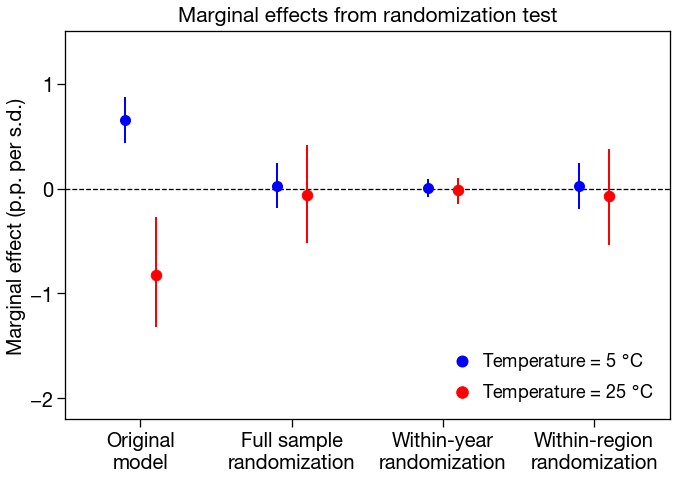

In [9]:
fig = plt.figure(figsize=(10,7))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.3
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.3
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.3

gs1 = gridspec.GridSpec(1,1)
gs1.update(left=0.12,right=0.96,top=0.89,bottom=0.12,wspace=0.15,hspace=0.3)

ax = plt.subplot(gs1[0,0])

plt.scatter([0.9,1.9,2.9,3.9],
        [x[0] for x in marginal_effects[:,ts==ts1]],
           s=100,color="blue",
            label="Temperature = "+str(ts1)+" $\degree$C",zorder=2)

plt.scatter([1.1,2.1,3.1,4.1],
        [x[0] for x in marginal_effects[:,ts==ts2]],
           s=110,color="red",label="Temperature = "+str(ts2)+" $\degree$C",
           zorder=2)

for k in [1,2,3,4]:
    plt.plot([k-0.1,k-0.1],
            [ci_lower[k-1,ts==ts1][0],ci_upper[k-1,ts==ts1][0]],
            color="blue",linewidth=2,zorder=2)
    plt.plot([k+0.1,k+0.1],
            [ci_lower[k-1,ts==ts2][0],ci_upper[k-1,ts==ts2][0]],
            color="red",linewidth=2,zorder=2)
    
lbs = ["Original"+"\n"+"model",
      "Full sample"+"\n"+"randomization",
      "Within-year"+"\n"+"randomization",
      "Within-region"+"\n"+"randomization"]
plt.xticks(ticks=[1,2,3,4],
          labels=lbs)
plt.xlim([0.5,4.5])
plt.ylim([-2.2,1.5])
plt.yticks([-2,-1,0,1])
plt.ylabel("Marginal effect (p.p. per s.d.)")

plt.legend(loc="lower right",frameon=False,
          fontsize=18,markerscale=1.1,
          handletextpad=0.1)
plt.axhline(y=0,color="black",linewidth=1.3,linestyle="--",
           zorder=1)
plt.title("Marginal effects from randomization test",
         pad=10,fontsize=21)


plt.savefig("../Figures/Tx_RandomizationTest_MarginalEffects.pdf")
plt.show()